In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

### Analysis of variance

ANOVA is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. ANOVA was developed by the statistician Ronald Fisher. ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. In other words, the ANOVA is used to test the difference between two or more means.

As we know, T-Tests aim to test whether the means of two groups are different from each other at the population level. That is, thanks to these tests, we can get information about the average of two groups. But in real life, we are often faced with the need to compare the averages of more than two groups. The ANOVA is a statistical inference test that lets you compare multiple groups at the same time. For instance, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable.

### One-Way ANOVA:

What do we mean when we say one-way ANOVA?
One-way ANOVA is a type of statistical test that compares the variance in group means within a sample, considering only one independent variable or factor. It is a hypothesis-based test, meaning it aims to evaluate multiple mutually exclusive theories about our data.

### When would we use a one-way ANOVA?

Use one-way ANOVA when you collect data about a categorical independent variable and a quantitative dependent variable. The independent variable must have at least three levels (ie at least three different groups or categories). The only difference between one-way and two-way ANOVA is the number of independent variables. A one-way ANOVA has one independent variable, while a two-way ANOVA has two.

In the case of the ANOVA, we will use the f-distribution.

The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. For example, testing the relationship between shoe brand (Nike, Adidas, Saucony, Hoka) and race finish times in a marathon.

### Our hyphothesis for one-way ANOVA test:

Null hypothesis: there is no significant difference between the group means

Alternative hypothesis: there is significant difference between the group means

### Create random data for one-way ANOVA test

In [3]:
np.random.seed(11)

shoe_brand_names = ['nike', 'adidas', 'saucony', 'hoka', 'converse', 'puma', 'timberland']
shoe_brands = np.random.choice(a=shoe_brand_names, p=[0.05, 0.13, 0.25, 0.05, 0.3, 0.2, 0.02], size=5000)
marathon_times = stats.poisson.rvs(loc=18, mu=30, size=5000)

In [4]:
marathon_frame = pd.DataFrame({'shoe': shoe_brands, 'marathon': marathon_times})
marathon_frame

,shoe,marathon
0,saucony,40
1,nike,64
2,hoka,46
3,converse,58
4,saucony,50
...,...,...
4995,converse,52
4996,saucony,51
4997,adidas,38
4998,saucony,48


In [5]:
groups = marathon_frame.groupby('shoe').groups

In [7]:
nike = marathon_times[groups['nike']]
adidas = marathon_times[groups['adidas']]
saucony = marathon_times[groups['saucony']]
hoka = marathon_times[groups['hoka']]
converse = marathon_times[groups['converse']]
puma = marathon_times[groups['puma']]
timberland = marathon_times[groups['timberland']]

In [11]:
normality_results = {}

for shoe in ['nike', 'adidas', 'saucony', 'hoka', 'converse', 'puma', 'timberland']:
    times = marathon_frame[marathon_frame['shoe'] == shoe]['marathon']
    stat, p = stats.normaltest(times)
    normality_results[shoe] = p

for shoe, p_value in normality_results.items():
    print(f"{shoe}: p-value = {p_value}")

nike: p-value = 0.7613046425646661
adidas: p-value = 0.4203045827491586
saucony: p-value = 0.034393676729916695
hoka: p-value = 0.4571501797585965
converse: p-value = 0.005579882437788775
puma: p-value = 0.2398523001510822
timberland: p-value = 0.9946520155828917


In [14]:
group_sizes = marathon_frame.groupby('shoe')['marathon'].size()
print(group_sizes)

shoe
adidas         652
converse      1472
hoka           262
nike           229
puma          1034
saucony       1263
timberland      88
Name: marathon, dtype: int64


In [16]:
shoe_groups = marathon_frame['shoe'].unique()

group_data = [marathon_frame[marathon_frame['shoe'] == shoe]['marathon'] for shoe in shoe_groups]

stat, p = stats.levene(*group_data)

if p < 0.05:
    print("Variances are significantly different across shoe groups")
else:
    print("No significant difference in variances across shoe groups.")

No significant difference in variances across shoe groups.


In [17]:
stats.f_oneway(nike, adidas, saucony, hoka, converse, puma, timberland)

F_onewayResult(statistic=1.0545716280465174, pvalue=0.38768383569947124)

In [18]:
model = ols('marathon ~ shoe',                
            data = marathon_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

                 sum_sq      df         F    PR(>F)
shoe         187.079498     6.0  1.054572  0.387684
Residual  147625.176302  4993.0       NaN       NaN


### Result:

Given that the p_value (0.387) is higher than 0.05, we fail to reject the H0 hypothesis. That is, there is no significant difference between the group means. As can be seen, we obtained the same p_value and f_statistic (1.054) with the statsmodels library as with the scipy library

### Now we will do new marathon times data where the group is different and then will run a second ANOVA

In [19]:
np.random.seed(11)

shoe_brands = np.random.choice(a = shoe_brand_names,
                               p = [0.05, 0.13 ,0.25, 0.05, 0.3, 0.2, 0.02],
                               size = 5000)

adidas_marathon = stats.poisson.rvs(loc = 18, mu = 32, size = 5000)
marathon_times = stats.poisson.rvs(loc = 18, mu = 30, size = 5000)
marathon_times = np.where(shoe_brands == "adidas", adidas_marathon, marathon_times)

marathon_frame = pd.DataFrame({"shoe" : shoe_brands, "marathon" : marathon_times})
groups = marathon_frame.groupby("shoe").groups

In [20]:
nike = marathon_times[groups["nike"]]
adidas = marathon_times[groups["adidas"]]
saucony = marathon_times[groups["saucony"]]
hoka = marathon_times[groups["hoka"]]
converse = marathon_times[groups["converse"]]
puma = marathon_times[groups["puma"]]
timberland = marathon_times[groups["timberland"]]

stats.f_oneway(nike, adidas, saucony, hoka, converse, puma, timberland)

F_onewayResult(statistic=16.140575626102837, pvalue=1.7493012888568482e-18)

In [21]:
model = ols('marathon ~ shoe',                
            data = marathon_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

                 sum_sq      df          F        PR(>F)
shoe        2875.823303     6.0  16.140576  1.749301e-18
Residual  148270.070897  4993.0        NaN           NaN


### Result: 

Given that the p_value (0.0000) is lower than 0.05, we will reject the H0 hypothesis. That is, there is significant difference between the group means. The result of the second hypothesis test revealed that there is a significant difference between the marathon finishing times of shoe brands. We made this difference. How? We changed the marathon finish time values for the adidas brand

### But what if we want to see which group causes the test to give a positive result?

To check which groups differ after getting a positive ANOVA result, we can use from "post-hoc test". This test helps us to perform separate t-tests (by using stats.ttest_ind()) for each pair of groups.

In [22]:
shoe_pairs = []

for shoe1 in range(6):
    for shoe2 in range(shoe1 + 1, 7):
        shoe_pairs.append((shoe_brand_names[shoe1], shoe_brand_names[shoe2]))

# conduct t-test on each pair
for shoe1, shoe2 in shoe_pairs:
    print("Pairs of shoe brands:", shoe1, shoe2)
    print(stats.ttest_ind(marathon_times[groups[shoe1]], 
                          marathon_times[groups[shoe2]]))

Pairs of shoe brands: nike adidas
TtestResult(statistic=-4.136913892235316, pvalue=3.858081777160946e-05, df=879.0)
Pairs of shoe brands: nike saucony
TtestResult(statistic=1.7294858472676442, pvalue=0.08392928249871691, df=1490.0)
Pairs of shoe brands: nike hoka
TtestResult(statistic=1.1732602515339092, pvalue=0.24126261991619619, df=489.0)
Pairs of shoe brands: nike converse
TtestResult(statistic=0.30991388348831994, pvalue=0.7566644519796516, df=1699.0)
Pairs of shoe brands: nike puma
TtestResult(statistic=0.9354867168632909, pvalue=0.34971663570171097, df=1261.0)
Pairs of shoe brands: nike timberland
TtestResult(statistic=0.5309697705983416, pvalue=0.5958138922346061, df=315.0)
Pairs of shoe brands: adidas saucony
TtestResult(statistic=9.238980918359598, pvalue=6.41210237819639e-20, df=1913.0)
Pairs of shoe brands: adidas hoka
TtestResult(statistic=5.739165261206918, pvalue=1.2945610765273465e-08, df=912.0)
Pairs of shoe brands: adidas converse
TtestResult(statistic=7.2994316573902

### Interpreting the results: 

The p-values for each dual t-test indicate that the mean of the adidas brands is likely to differ from the other groups. For this reason, the p-values for the adidas group in each t-test are significantly smaller than 0.05. But using unadjusted pairwise t-tests may overestimate significance. Of course, the more comparisons we make, the more likely we will encounter an unlikely outcome by chance. We can adjust this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. For our problem, if significance level is 0.05, we'd be looking for p-values of 0.05/10 = 0.005 or less. This adjustment method is called as the Bonferroni correction. Another common post hoc-test is Tukey's test.

### Conduct pairwise_tukeyhsd() test to see which group mean differs

group1,group2,meandiff,p-adj,lower,upper,reject
adidas,converse,-1.9109,0.0,-2.667,-1.1548,True
adidas,hoka,-2.3509,0.0,-3.5266,-1.1752,True
adidas,nike,-1.7906,0.0004,-3.0252,-0.5559,True
adidas,puma,-2.1539,0.0,-2.9577,-1.3501,True
adidas,saucony,-2.4609,0.0,-3.236,-1.6858,True
adidas,timberland,-2.1522,0.0092,-3.9776,-0.3268,True
converse,hoka,-0.44,0.8928,-1.5178,0.6377,False
converse,nike,0.1203,0.9999,-1.0215,1.2621,False
converse,puma,-0.243,0.9286,-0.8952,0.4092,False
converse,saucony,-0.55,0.1167,-1.1665,0.0664,False


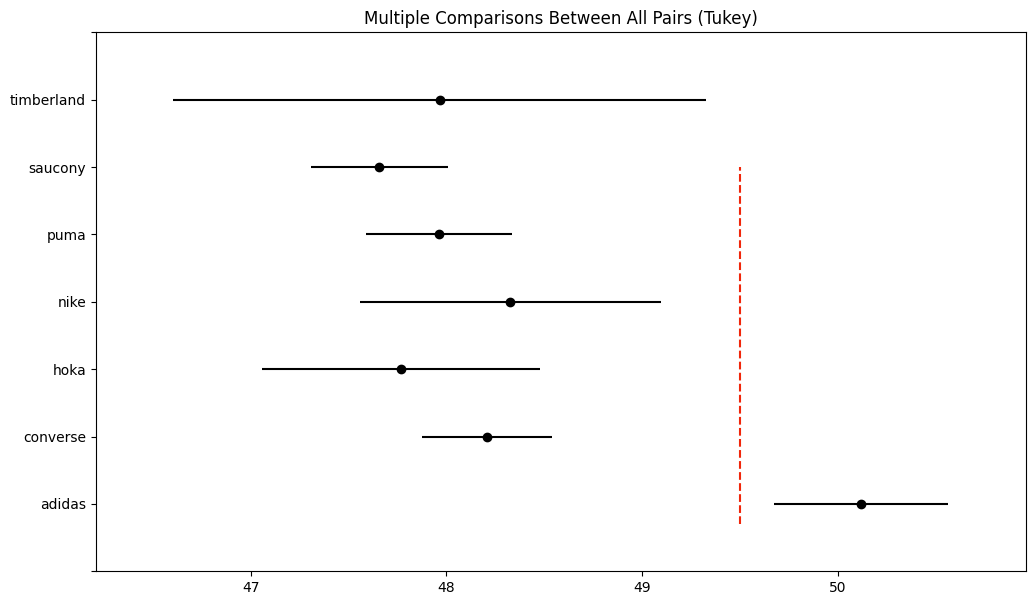

In [23]:
tukey = pairwise_tukeyhsd(endog = marathon_times, groups = shoe_brands, alpha = 0.05)

tukey.plot_simultaneous(figsize = (12, 7))    
plt.vlines(x = 49.5, ymin = -0.3, ymax = 5, color = "#F0260A", linestyles = "dashed")
tukey.summary()

### Interpreting the results: 

Everything is clear from the results of the Tukey test. By looking at the results of this test, we can see whether we can reject the null hypothesis for each pair of the groups on the significance level we consider, also we can see the confidence intervals and the mean differences. This test shows us that the adidas group is significantly different from the others